Datasetlər olan kitabxana, normallaşdırma, klasterizasiya və vizualizasiya kitabxanaları yüklənir.

In [16]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Datasetlər arasından İRİS bazası yüklənir.

In [36]:
baza=datasets.load_iris()
features=baza.data

Ədədi verilənlərin normallaşdırılması üçün StandartScaler funksiyasından istifadə edilir.

In [37]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

K-Means alqoritmi üçün klasterlərin sayı 3 olaraq əvvəlcədən təyin edilir.

In [38]:
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1, init='k-means++')

Klasterizasiya nəticəsində əldə olunan qrupların nömrələri (label) CSV faylına yazılır.

In [39]:
model = cluster.fit(features_std)
label=model.labels_
df=pd.DataFrame(label)
df.to_csv (r'/dataframe.csv', index = False, header=True)

model.labels_ və predict(features_std) nəticələri eyni qrupları verir. Klasterlərin sayını 3 seçdiyimiz üçün yaranan qruplar 0, 1 və 2 olaraq işarə edilmişdir.

In [40]:
cluster.predict(features_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [41]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Klasterlərin mərkəzi nöqtələrinə baxmaq üçün:

In [31]:
print(cluster.cluster_centers_)

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


Nümunələrin qruplar şəklində vizuallaşdırılması. (Matplotlib kitabxanasını əvvəlcədən yükləmişdik)

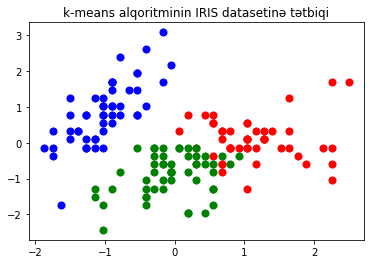

In [43]:
plt.scatter(features_std[predict==0,0],features_std[predict==0,1],s=50,color='red')
plt.scatter(features_std[predict==1,0],features_std[predict==1,1],s=50,color='blue')
plt.scatter(features_std[predict==2,0],features_std[predict==2,1],s=50,color='green')
plt.title('k-means alqoritminin IRIS datasetinə tətbiqi')
plt.show()

Yuxarıda klaster sayını təsadüfi olaraq 3 seçmişdik. Təsadüfi şəkildə seçim problemlərə yol aça bilər. Bu səbəbdən optimal sayda klasterlərin seçilməsi üçün elbow metodu tətbiq edilir.

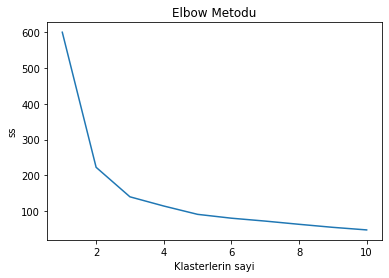

In [44]:
ss = []
for i in range(1,11):
    cluster=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(features_std)
    ss.append(cluster.inertia_)
plt.plot(range(1,11),ss)
plt.title('Elbow Metodu')
plt.xlabel('Klasterlerin sayi')
plt.ylabel('ss')
plt.show()

Burada ss - klasterdəki hər bir verilənin klaster mərkəzindən olan məsafəsinin kvadratları cəmidir. İdeal halda bu cəm sıfıra bərabər olardı və bu o demək idi ki, hər bir verilən özü bir klasterdir. Bu isə mənasızdır. Elbow metodunun qrafikinə nəzər salsaq 4 və 6 arasında qırılmanı da görə bilərik. Yəni klaster sayının 5 seçilməsi də yaxşı qərar olardı.

In [49]:
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(features_std)

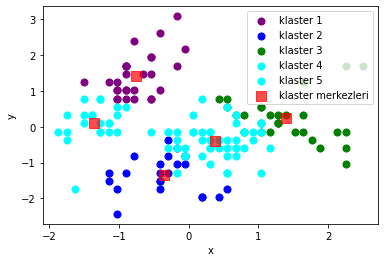

In [54]:
plt.scatter(features_std[y_means==0,0],features_std[y_means==0,1],s=50, c='purple',label='klaster 1')
plt.scatter(features_std[y_means==1,0],features_std[y_means==1,1],s=50, c='blue',label='klaster 2')
plt.scatter(features_std[y_means==2,0],features_std[y_means==2,1],s=50, c='green',label='klaster 3')
plt.scatter(features_std[y_means==3,0],features_std[y_means==3,1],s=50, c='cyan',label='klaster 4')
plt.scatter(features_std[y_means==4,0],features_std[y_means==4,1],s=50, c='cyan',label='klaster 5')
plt.scatter(km5.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=100,marker='s', c='red', 
            alpha=0.7, label='klaster merkezleri')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()